# get APA marker

In [1]:
import pandas as pd
import scanpy as sc

In [3]:
adata=sc.read('/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/human_intestinal_APA_exp_scale.h5ad')
adata

AnnData object with n_obs × n_vars = 14537 × 14025
    obs: 'celltype', 'sample_id', 'organ'
    var: 'cluster_start', 'cluster_end', 'cluster_score', 'cluster_strand', 'gene_start', 'gene_end', 'gene_score', 'gene_strand', 'original_cluster_id', 'cluster_chr', 'gene_chr', 'gene_id', 'gene_name'
    uns: 'log1p', 'neighbors', 'paga'
    obsm: 'X_pca', 'X_tsne'
    layers: 'raw_count'
    obsp: 'connectivities', 'distances'

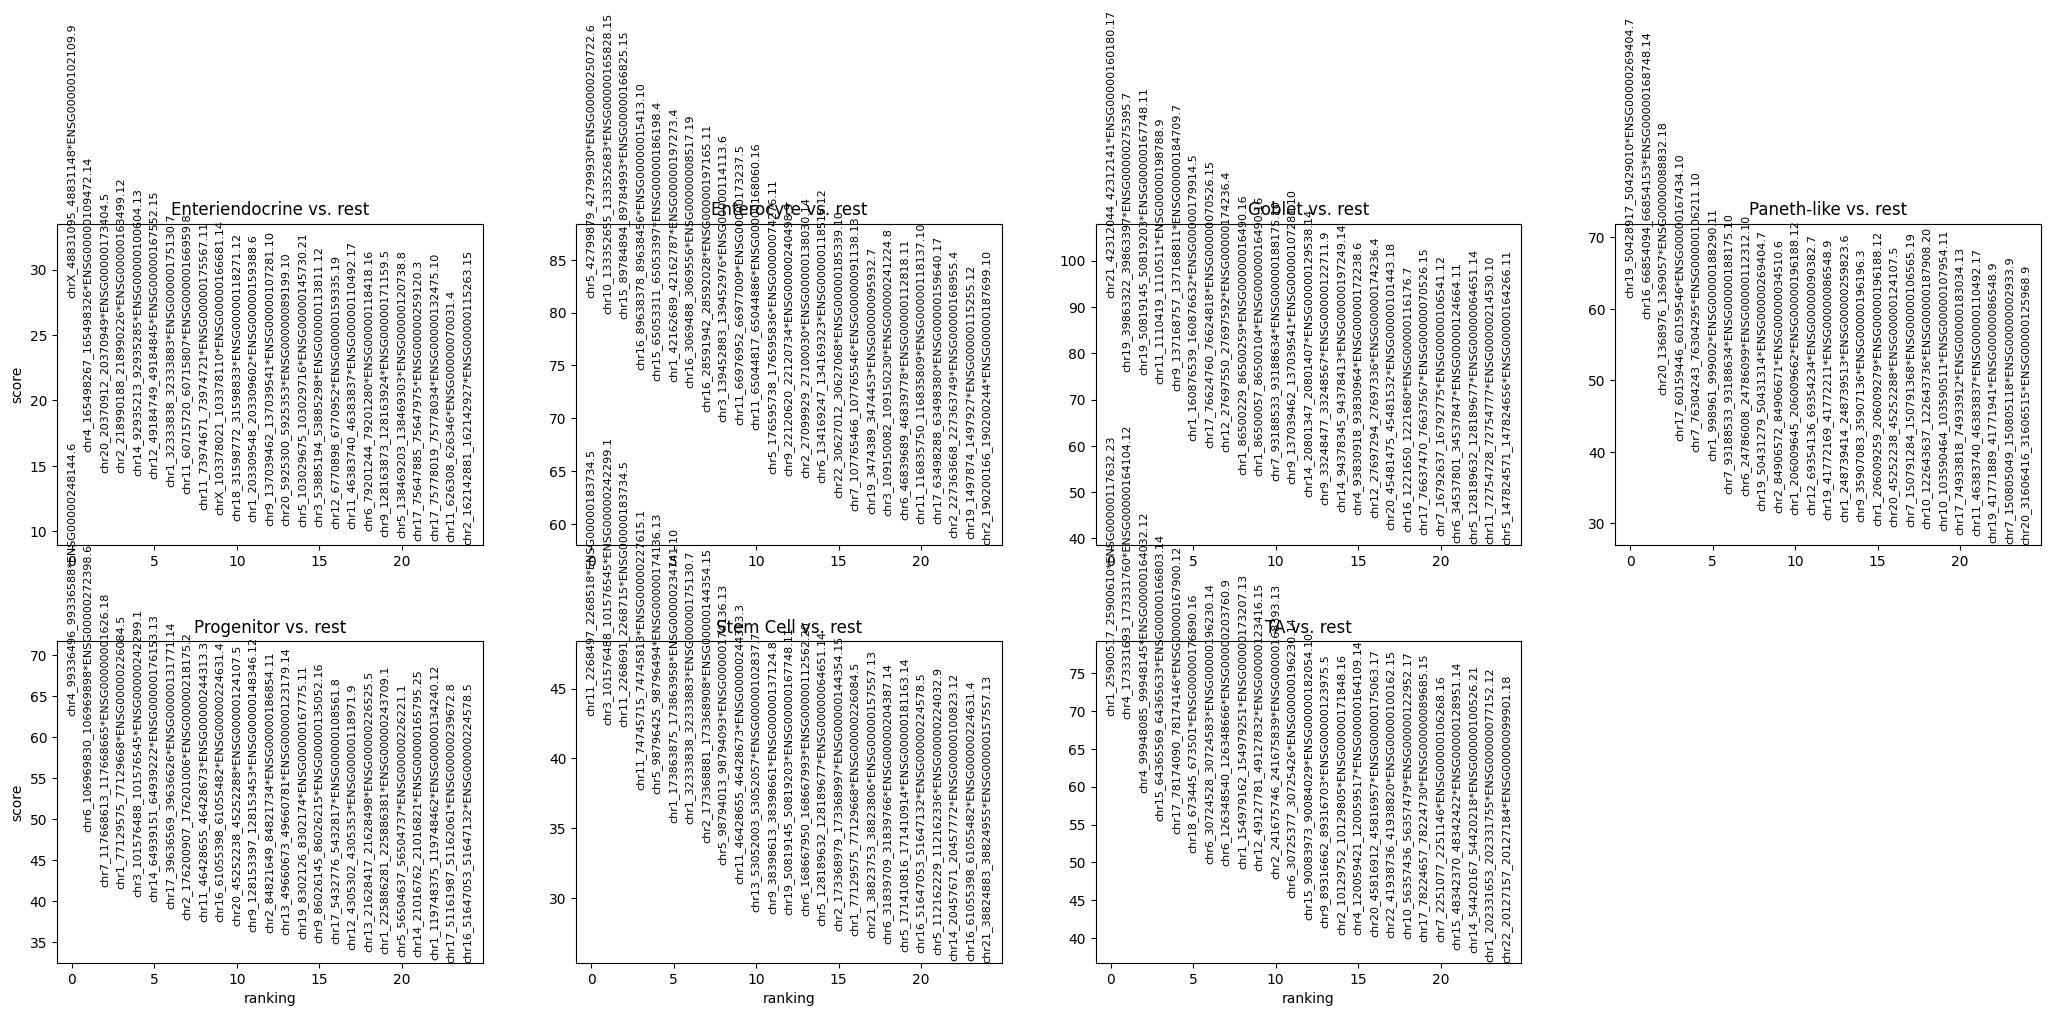

In [4]:
sc.tl.rank_genes_groups(adata, "celltype", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [5]:
adata

result = adata.uns["rank_genes_groups"]
result

{'params': {'groupby': 'celltype',
  'reference': 'rest',
  'method': 't-test',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('chrX_48831095_48831148*ENSG00000102109.9', 'chr5_42799879_42799930*ENSG00000250722.6', 'chr21_42312044_42312141*ENSG00000160180.17', 'chr19_50428917_50429010*ENSG00000269404.7', 'chr4_99336496_99336588*ENSG00000248144.6', 'chr11_2268497_2268518*ENSG00000183734.5', 'chr1_25900517_25900610*ENSG00000117632.23'),
            ('chr4_165498267_165498326*ENSG00000109472.14', 'chr10_133352655_133352683*ENSG00000165828.15', 'chr19_39863322_39863397*ENSG00000275395.7', 'chr16_66854094_66854153*ENSG00000168748.14', 'chr6_106969830_106969898*ENSG00000272398.6', 'chr3_101576488_101576545*ENSG00000242299.1', 'chr4_173331693_173331760*ENSG00000164104.12'),
            ('chr20_20370912_20370949*ENSG00000173404.5', 'chr15_89784894_89784993*ENSG00000166825.15', 'chr19_50819145_50819203*ENSG00000167748.11', 'chr20_1368976_13690

In [6]:
groups = result["names"].dtype.names
groups

('Enteriendocrine',
 'Enterocyte',
 'Goblet',
 'Paneth-like',
 'Progenitor',
 'Stem Cell',
 'TA')

In [7]:
markergenedf=pd.DataFrame(
    {
        group + "_" + key[:1]: result[key][group]
        for group in groups
        for key in ["names", "pvals"]
    }
).head(20)

In [8]:
markergenedf

,Enteriendocrine_n,Enteriendocrine_p,Enterocyte_n,Enterocyte_p,Goblet_n,Goblet_p,Paneth-like_n,Paneth-like_p,Progenitor_n,Progenitor_p,Stem Cell_n,Stem Cell_p,TA_n,TA_p
0,chrX_48831095_48831148*ENSG00000102109.9,5.654732e-56,chr5_42799879_42799930*ENSG00000250722.6,0.0,chr21_42312044_42312141*ENSG00000160180.17,0.000000e+00,chr19_50428917_50429010*ENSG00000269404.7,1.895560e-299,chr4_99336496_99336588*ENSG00000248144.6,0.000000e+00,chr11_2268497_2268518*ENSG00000183734.5,1.812381e-195,chr1_25900517_25900610*ENSG00000117632.23,0.000000e+00
1,chr4_165498267_165498326*ENSG00000109472.14,2.097977e-32,chr10_133352655_133352683*ENSG00000165828.15,0.0,chr19_39863322_39863397*ENSG00000275395.7,0.000000e+00,chr16_66854094_66854153*ENSG00000168748.14,2.516331e-285,chr6_106969830_106969898*ENSG00000272398.6,0.000000e+00,chr3_101576488_101576545*ENSG00000242299.1,7.053364e-213,chr4_173331693_173331760*ENSG00000164104.12,0.000000e+00
2,chr20_20370912_20370949*ENSG00000173404.5,9.277194e-29,chr15_89784894_89784993*ENSG00000166825.15,0.0,chr19_50819145_50819203*ENSG00000167748.11,0.000000e+00,chr20_1368976_1369057*ENSG00000088832.18,3.341886e-248,chr7_117668613_117668665*ENSG00000001626.18,0.000000e+00,chr11_2268691_2268715*ENSG00000183734.5,2.399040e-191,chr4_99948085_99948145*ENSG00000164032.12,0.000000e+00
3,chr2_218990188_218990226*ENSG00000163499.12,1.032599e-28,chr16_89638378_89638456*ENSG00000015413.10,0.0,chr11_1110419_1110511*ENSG00000198788.9,0.000000e+00,chr17_60159446_60159546*ENSG00000167434.10,1.491914e-199,chr1_77129575_77129668*ENSG00000226084.5,0.000000e+00,chr11_74745715_74745813*ENSG00000227615.1,1.383582e-183,chr15_64365569_64365633*ENSG00000166803.14,0.000000e+00
4,chr14_92935213_92935285*ENSG00000100604.13,4.926364e-28,chr15_65053311_65053397*ENSG00000186198.4,0.0,chr9_137168757_137168811*ENSG00000184709.7,0.000000e+00,chr7_76304243_76304295*ENSG00000106211.10,2.081036e-195,chr3_101576488_101576545*ENSG00000242299.1,0.000000e+00,chr5_98796425_98796494*ENSG00000174136.13,6.519479e-167,chr17_78174090_78174146*ENSG00000167900.12,4.189835e-313
5,chr12_49184749_49184845*ENSG00000167552.15,1.686998e-27,chr1_42162689_42162787*ENSG00000197273.4,0.0,chr1_160876539_160876632*ENSG00000179914.5,0.000000e+00,chr1_998961_999002*ENSG00000188290.11,5.717298e-183,chr14_64939151_64939222*ENSG00000176153.13,0.000000e+00,chr1_173863875_173863958*ENSG00000234741.10,5.224839e-167,chr18_673445_673501*ENSG00000176890.16,3.363699e-298
6,chr1_32333838_32333883*ENSG00000175130.7,3.311430e-26,chr16_3069488_3069556*ENSG00000008517.19,0.0,chr17_76624760_76624818*ENSG00000070526.15,0.000000e+00,chr7_93188533_93188634*ENSG00000188175.10,4.312578e-159,chr17_39636569_39636626*ENSG00000131771.14,8.461513e-310,chr1_32333838_32333883*ENSG00000175130.7,1.240117e-162,chr6_30724528_30724583*ENSG00000196230.14,6.403108e-304
7,chr11_60715720_60715807*ENSG00000166959.8,7.177162e-25,chr16_28591942_28592028*ENSG00000197165.11,0.0,chr12_27697550_27697592*ENSG00000174236.4,0.000000e+00,chr6_24786008_24786099*ENSG00000112312.10,4.543421e-156,chr2_176200907_176201006*ENSG00000218175.2,1.031499e-291,chr2_173368881_173368908*ENSG00000144354.15,1.940006e-149,chr6_126348540_126348666*ENSG00000203760.9,1.455804e-287
8,chr11_73974671_73974721*ENSG00000175567.11,7.316399e-22,chr3_139452883_139452976*ENSG00000114113.6,0.0,chr1_86500229_86500259*ENSG00000016490.16,0.000000e+00,chr19_50431279_50431314*ENSG00000269404.7,2.974359e-141,chr11_46428655_46428673*ENSG00000244313.3,5.995975e-290,chr5_98794013_98794093*ENSG00000174136.13,3.454773e-139,chr1_154979162_154979251*ENSG00000173207.13,2.021420e-291
9,chrX_103378021_103378110*ENSG00000166681.14,5.949738e-21,chr11_66976952_66977009*ENSG00000173237.5,0.0,chr1_86500057_86500104*ENSG00000016490.16,0.000000e+00,chr2_84906572_84906671*ENSG00000034510.6,1.138488e-145,chr16_61055398_61055482*ENSG00000224631.4,8.517425e-287,chr11_46428655_46428673*ENSG00000244313.3,1.960881e-140,chr12_49127781_49127832*ENSG00000123416.15,5.617764e-306


In [9]:
#markergenedf.to_csv('/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/markergene_overlap/APA_markergene_top20.csv')

# get gene exp marker

In [10]:
import pandas as pd
import scanpy as sc

In [11]:
adata=sc.read('/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/human_intestinal_gene_exp_scale.h5ad')
adata

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/anndata-0.10.3-py3.9.egg/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 14537 × 62700
    obs: 'celltype', 'sample_id', 'organ'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype_colors', 'log1p', 'raw_count'
    obsm: 'X_tsne'

In [13]:
pasadata=sc.read('/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/human_intestinal_APA_exp_scale.h5ad')
pasadata

AnnData object with n_obs × n_vars = 14537 × 14025
    obs: 'celltype', 'sample_id', 'organ'
    var: 'cluster_start', 'cluster_end', 'cluster_score', 'cluster_strand', 'gene_start', 'gene_end', 'gene_score', 'gene_strand', 'original_cluster_id', 'cluster_chr', 'gene_chr', 'gene_id', 'gene_name'
    uns: 'log1p', 'neighbors', 'paga'
    obsm: 'X_pca', 'X_tsne'
    layers: 'raw_count'
    obsp: 'connectivities', 'distances'

In [14]:
selectadata=adata[:,adata.var['gene_ids'].isin(pasadata.var['gene_id'])]
selectadata

View of AnnData object with n_obs × n_vars = 14537 × 9576
    obs: 'celltype', 'sample_id', 'organ'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype_colors', 'log1p', 'raw_count'
    obsm: 'X_tsne'

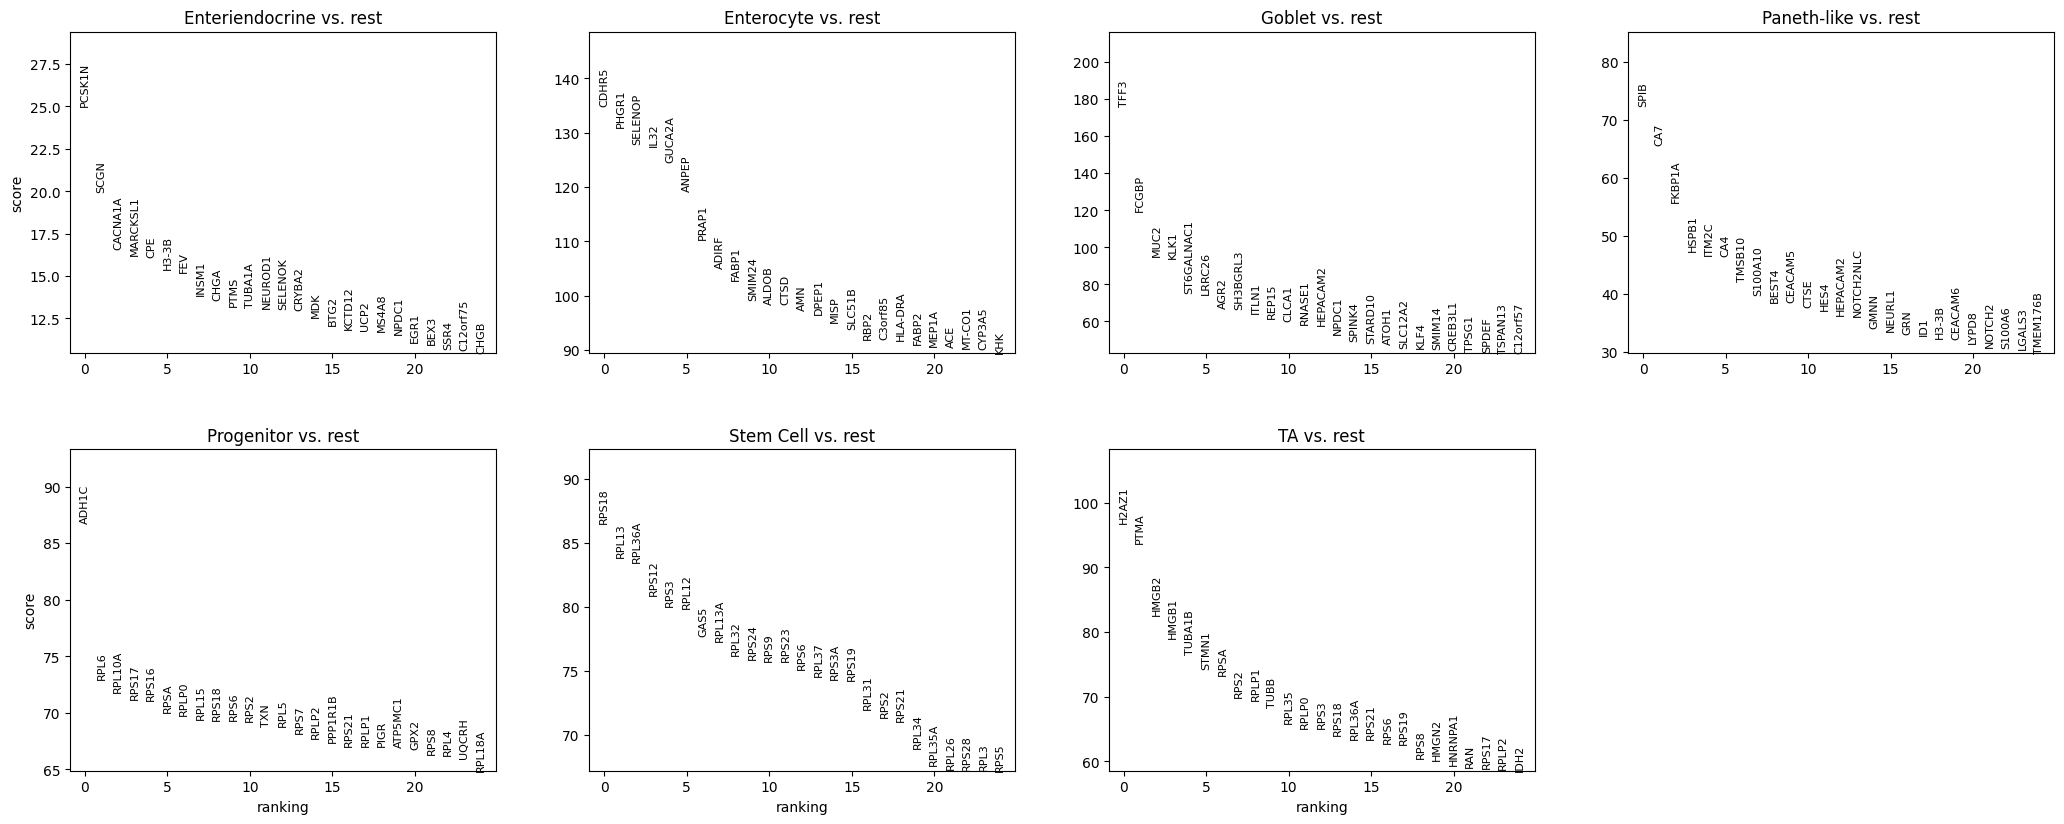

In [15]:
sc.tl.rank_genes_groups(adata, "celltype", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [16]:
adata

result = adata.uns["rank_genes_groups"]
result

{'params': {'groupby': 'celltype',
  'reference': 'rest',
  'method': 't-test',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('PCSK1N', 'CDHR5', 'TFF3', 'SPIB', 'ADH1C', 'RPS18', 'H2AZ1'),
            ('SCGN', 'PHGR1', 'FCGBP', 'CA7', 'RPL6', 'RPL13', 'PTMA'),
            ('CACNA1A', 'SELENOP', 'MUC2', 'FKBP1A', 'RPL10A', 'RPL36A', 'HMGB2'),
            ...,
            ('SLC13A1', 'RPS3', 'FABP1', 'CYBRD1', 'SELENOP', 'PLAC8', 'PHGR1'),
            ('PLA2G12B', 'RPS12', 'ANPEP', 'TMIGD1', 'GUCA2A', 'FABP1', 'CDKN2B-AS1'),
            ('CDA', 'RPS6', 'CES2', 'SERPINA1', 'SERPINA1', 'PHGR1', 'SELENOP')],
           dtype=[('Enteriendocrine', 'O'), ('Enterocyte', 'O'), ('Goblet', 'O'), ('Paneth-like', 'O'), ('Progenitor', 'O'), ('Stem Cell', 'O'), ('TA', 'O')]),
 'scores': rec.array([( 25.045946,  134.98993, 176.40553 ,  72.47206 ,  86.7337  ,  86.50242 ,  96.75902 ),
            ( 19.957289,  130.96371, 119.71843 ,  65.67404 ,  72.944

In [17]:
groups = result["names"].dtype.names
groups

('Enteriendocrine',
 'Enterocyte',
 'Goblet',
 'Paneth-like',
 'Progenitor',
 'Stem Cell',
 'TA')

In [18]:
markergenedf=pd.DataFrame(
    {
        group + "_" + key[:1]: result[key][group]
        for group in groups
        for key in ["names", "pvals"]
    }
).head(20)

In [19]:
markergenedf

,Enteriendocrine_n,Enteriendocrine_p,Enterocyte_n,Enterocyte_p,Goblet_n,Goblet_p,Paneth-like_n,Paneth-like_p,Progenitor_n,Progenitor_p,Stem Cell_n,Stem Cell_p,TA_n,TA_p
0,PCSK1N,5.490882e-51,CDHR5,0.0,TFF3,0.000000e+00,SPIB,0.000000e+00,ADH1C,0.0,RPS18,0.0,H2AZ1,0.0
1,SCGN,5.669504e-41,PHGR1,0.0,FCGBP,0.000000e+00,CA7,1.157212e-316,RPL6,0.0,RPL13,0.0,PTMA,0.0
2,CACNA1A,1.279748e-33,SELENOP,0.0,MUC2,0.000000e+00,FKBP1A,3.046015e-283,RPL10A,0.0,RPL36A,0.0,HMGB2,0.0
3,MARCKSL1,5.646542e-33,IL32,0.0,KLK1,0.000000e+00,HSPB1,8.669571e-237,RPS17,0.0,RPS12,0.0,HMGB1,0.0
4,CPE,1.515526e-32,GUCA2A,0.0,ST6GALNAC1,0.000000e+00,ITM2C,6.806294e-245,RPS16,0.0,RPS3,0.0,TUBA1B,0.0
5,H3-3B,4.686077e-31,ANPEP,0.0,LRRC26,0.000000e+00,CA4,5.164113e-227,RPSA,0.0,RPL12,0.0,STMN1,0.0
6,FEV,2.214965e-30,PRAP1,0.0,AGR2,0.000000e+00,TMSB10,6.209717e-210,RPLP0,0.0,GAS5,0.0,RPSA,0.0
7,INSM1,3.642499e-27,ADIRF,0.0,SH3BGRL3,0.000000e+00,S100A10,1.262316e-200,RPL15,0.0,RPL13A,0.0,RPS2,0.0
8,CHGA,1.812014e-26,FABP1,0.0,ITLN1,0.000000e+00,BEST4,1.765780e-181,RPS18,0.0,RPL32,0.0,RPLP1,0.0
9,PTMS,1.007023e-25,SMIM24,0.0,REP15,0.000000e+00,CEACAM5,1.768669e-189,RPS6,0.0,RPS24,0.0,TUBB,0.0


In [20]:
#markergenedf.to_csv('/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/markergene_overlap/exp_markergene_top20.csv')

# Check overlap 

In [21]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import re

In [22]:
pasdf=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/markergene_overlap/APA_markergene_top20.csv',index_col=0)
pasdf

,Enteriendocrine_n,Enteriendocrine_p,Enterocyte_n,Enterocyte_p,Goblet_n,Goblet_p,Paneth-like_n,Paneth-like_p,Progenitor_n,Progenitor_p,Stem Cell_n,Stem Cell_p,TA_n,TA_p
0,chrX_48831095_48831148*ENSG00000102109.9,5.654732e-56,chr5_42799879_42799930*ENSG00000250722.6,0.0,chr21_42312044_42312141*ENSG00000160180.17,0.000000e+00,chr19_50428917_50429010*ENSG00000269404.7,1.895560e-299,chr4_99336496_99336588*ENSG00000248144.6,0.000000e+00,chr11_2268497_2268518*ENSG00000183734.5,1.812381e-195,chr1_25900517_25900610*ENSG00000117632.23,0.000000e+00
1,chr4_165498267_165498326*ENSG00000109472.14,2.097977e-32,chr10_133352655_133352683*ENSG00000165828.15,0.0,chr19_39863322_39863397*ENSG00000275395.7,0.000000e+00,chr16_66854094_66854153*ENSG00000168748.14,2.516331e-285,chr6_106969830_106969898*ENSG00000272398.6,0.000000e+00,chr3_101576488_101576545*ENSG00000242299.1,7.053364e-213,chr4_173331693_173331760*ENSG00000164104.12,0.000000e+00
2,chr20_20370912_20370949*ENSG00000173404.5,9.277194e-29,chr15_89784894_89784993*ENSG00000166825.15,0.0,chr19_50819145_50819203*ENSG00000167748.11,0.000000e+00,chr20_1368976_1369057*ENSG00000088832.18,3.341886e-248,chr7_117668613_117668665*ENSG00000001626.18,0.000000e+00,chr11_2268691_2268715*ENSG00000183734.5,2.399040e-191,chr4_99948085_99948145*ENSG00000164032.12,0.000000e+00
3,chr2_218990188_218990226*ENSG00000163499.12,1.032599e-28,chr16_89638378_89638456*ENSG00000015413.10,0.0,chr11_1110419_1110511*ENSG00000198788.9,0.000000e+00,chr17_60159446_60159546*ENSG00000167434.10,1.491914e-199,chr1_77129575_77129668*ENSG00000226084.5,0.000000e+00,chr11_74745715_74745813*ENSG00000227615.1,1.383582e-183,chr15_64365569_64365633*ENSG00000166803.14,0.000000e+00
4,chr14_92935213_92935285*ENSG00000100604.13,4.926364e-28,chr15_65053311_65053397*ENSG00000186198.4,0.0,chr9_137168757_137168811*ENSG00000184709.7,0.000000e+00,chr7_76304243_76304295*ENSG00000106211.10,2.081036e-195,chr3_101576488_101576545*ENSG00000242299.1,0.000000e+00,chr5_98796425_98796494*ENSG00000174136.13,6.519479e-167,chr17_78174090_78174146*ENSG00000167900.12,4.189835e-313
5,chr12_49184749_49184845*ENSG00000167552.15,1.686998e-27,chr1_42162689_42162787*ENSG00000197273.4,0.0,chr1_160876539_160876632*ENSG00000179914.5,0.000000e+00,chr1_998961_999002*ENSG00000188290.11,5.717298e-183,chr14_64939151_64939222*ENSG00000176153.13,0.000000e+00,chr1_173863875_173863958*ENSG00000234741.10,5.224839e-167,chr18_673445_673501*ENSG00000176890.16,3.363699e-298
6,chr1_32333838_32333883*ENSG00000175130.7,3.311430e-26,chr16_3069488_3069556*ENSG00000008517.19,0.0,chr17_76624760_76624818*ENSG00000070526.15,0.000000e+00,chr7_93188533_93188634*ENSG00000188175.10,4.312578e-159,chr17_39636569_39636626*ENSG00000131771.14,8.461513e-310,chr1_32333838_32333883*ENSG00000175130.7,1.240117e-162,chr6_30724528_30724583*ENSG00000196230.14,6.403108e-304
7,chr11_60715720_60715807*ENSG00000166959.8,7.177162e-25,chr16_28591942_28592028*ENSG00000197165.11,0.0,chr12_27697550_27697592*ENSG00000174236.4,0.000000e+00,chr6_24786008_24786099*ENSG00000112312.10,4.543421e-156,chr2_176200907_176201006*ENSG00000218175.2,1.031499e-291,chr2_173368881_173368908*ENSG00000144354.15,1.940006e-149,chr6_126348540_126348666*ENSG00000203760.9,1.455804e-287
8,chr11_73974671_73974721*ENSG00000175567.11,7.316399e-22,chr3_139452883_139452976*ENSG00000114113.6,0.0,chr1_86500229_86500259*ENSG00000016490.16,0.000000e+00,chr19_50431279_50431314*ENSG00000269404.7,2.974359e-141,chr11_46428655_46428673*ENSG00000244313.3,5.995975e-290,chr5_98794013_98794093*ENSG00000174136.13,3.454773e-139,chr1_154979162_154979251*ENSG00000173207.13,2.021420e-291
9,chrX_103378021_103378110*ENSG00000166681.14,5.949738e-21,chr11_66976952_66977009*ENSG00000173237.5,0.0,chr1_86500057_86500104*ENSG00000016490.16,0.000000e+00,chr2_84906572_84906671*ENSG00000034510.6,1.138488e-145,chr16_61055398_61055482*ENSG00000224631.4,8.517425e-287,chr11_46428655_46428673*ENSG00000244313.3,1.960881e-140,chr12_49127781_49127832*ENSG00000123416.15,5.617764e-306


In [23]:
expdf=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/markergene_overlap/exp_markergene_top20.csv',index_col=0)
expdf

,Enteriendocrine_n,Enteriendocrine_p,Enterocyte_n,Enterocyte_p,Goblet_n,Goblet_p,Paneth-like_n,Paneth-like_p,Progenitor_n,Progenitor_p,Stem Cell_n,Stem Cell_p,TA_n,TA_p
0,PCSK1N,5.490882e-51,CDHR5,0.0,TFF3,0.000000e+00,SPIB,0.000000e+00,ADH1C,0.0,RPS18,0.0,H2AZ1,0.0
1,SCGN,5.669504e-41,PHGR1,0.0,FCGBP,0.000000e+00,CA7,1.157212e-316,RPL6,0.0,RPL13,0.0,PTMA,0.0
2,CACNA1A,1.279748e-33,SELENOP,0.0,MUC2,0.000000e+00,FKBP1A,3.046015e-283,RPL10A,0.0,RPL36A,0.0,HMGB2,0.0
3,MARCKSL1,5.646542e-33,IL32,0.0,KLK1,0.000000e+00,HSPB1,8.669571e-237,RPS17,0.0,RPS12,0.0,HMGB1,0.0
4,CPE,1.515526e-32,GUCA2A,0.0,ST6GALNAC1,0.000000e+00,ITM2C,6.806294e-245,RPS16,0.0,RPS3,0.0,TUBA1B,0.0
5,H3-3B,4.686077e-31,ANPEP,0.0,LRRC26,0.000000e+00,CA4,5.164113e-227,RPSA,0.0,RPL12,0.0,STMN1,0.0
6,FEV,2.214965e-30,PRAP1,0.0,AGR2,0.000000e+00,TMSB10,6.209717e-210,RPLP0,0.0,GAS5,0.0,RPSA,0.0
7,INSM1,3.642499e-27,ADIRF,0.0,SH3BGRL3,0.000000e+00,S100A10,1.262316e-200,RPL15,0.0,RPL13A,0.0,RPS2,0.0
8,CHGA,1.812014e-26,FABP1,0.0,ITLN1,0.000000e+00,BEST4,1.765780e-181,RPS18,0.0,RPL32,0.0,RPLP1,0.0
9,PTMS,1.007023e-25,SMIM24,0.0,REP15,0.000000e+00,CEACAM5,1.768669e-189,RPS6,0.0,RPS24,0.0,TUBB,0.0


In [24]:
expmeltdf=expdf.melt()
expmeltdf

,variable,value
0,Enteriendocrine_n,PCSK1N
1,Enteriendocrine_n,SCGN
2,Enteriendocrine_n,CACNA1A
3,Enteriendocrine_n,MARCKSL1
4,Enteriendocrine_n,CPE
...,...,...
275,TA_p,0.0
276,TA_p,0.0
277,TA_p,0.0
278,TA_p,0.0


In [25]:
expmeltdf=expmeltdf[expmeltdf['variable'].str.contains('_n')]
expmeltdf

,variable,value
0,Enteriendocrine_n,PCSK1N
1,Enteriendocrine_n,SCGN
2,Enteriendocrine_n,CACNA1A
3,Enteriendocrine_n,MARCKSL1
4,Enteriendocrine_n,CPE
...,...,...
255,TA_n,RPS21
256,TA_n,RPS6
257,TA_n,RPS19
258,TA_n,RPS8


In [26]:
expmeltdf.columns=['celltype','gene_name']
expmeltdf

,celltype,gene_name
0,Enteriendocrine_n,PCSK1N
1,Enteriendocrine_n,SCGN
2,Enteriendocrine_n,CACNA1A
3,Enteriendocrine_n,MARCKSL1
4,Enteriendocrine_n,CPE
...,...,...
255,TA_n,RPS21
256,TA_n,RPS6
257,TA_n,RPS19
258,TA_n,RPS8


In [27]:
refdf=pd.read_csv('/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/run_scTail/SRR8513794-1/ref_file/ref_gene.tsv',delimiter='\t')
refdf

,Chromosome,Feature,Start,End,Strand,gene_id,gene_name
0,chr1,gene,11868,14409,+,ENSG00000290825.1,DDX11L2
1,chr1,gene,12009,13670,+,ENSG00000223972.6,DDX11L1
2,chr1,gene,29553,31109,+,ENSG00000243485.5,MIR1302-2HG
3,chr1,gene,30365,30503,+,ENSG00000284332.1,MIR1302-2
4,chr1,gene,52472,53312,+,ENSG00000268020.3,OR4G4P
...,...,...,...,...,...,...,...
62576,chrY,gene,26626519,26627159,-,ENSG00000231514.1,CCNQP2
62577,chrY,gene,57015104,57016096,-,ENSG00000292364.1,AMD1P2
62578,chrY,gene,57165511,57165845,-,ENSG00000292367.1,ELOCP24
62579,chrY,gene,57171889,57172769,-,ENSG00000292368.1,TRPC6P1


In [28]:
refdf=refdf[['gene_id','gene_name']]
refdf

,gene_id,gene_name
0,ENSG00000290825.1,DDX11L2
1,ENSG00000223972.6,DDX11L1
2,ENSG00000243485.5,MIR1302-2HG
3,ENSG00000284332.1,MIR1302-2
4,ENSG00000268020.3,OR4G4P
...,...,...
62576,ENSG00000231514.1,CCNQP2
62577,ENSG00000292364.1,AMD1P2
62578,ENSG00000292367.1,ELOCP24
62579,ENSG00000292368.1,TRPC6P1


In [29]:
expdf=expmeltdf.merge(refdf,on='gene_name')
expdf

,celltype,gene_name,gene_id
0,Enteriendocrine_n,PCSK1N,ENSG00000102109.9
1,Enteriendocrine_n,SCGN,ENSG00000079689.15
2,Enteriendocrine_n,CACNA1A,ENSG00000141837.22
3,Enteriendocrine_n,MARCKSL1,ENSG00000175130.7
4,Enteriendocrine_n,CPE,ENSG00000109472.14
...,...,...,...
135,TA_n,STMN1,ENSG00000117632.23
136,TA_n,TUBB,ENSG00000196230.14
137,TA_n,RPL35,ENSG00000136942.15
138,TA_n,RPS8,ENSG00000142937.12


In [30]:
pasmeltdf=pasdf.melt()
pasmeltdf

,variable,value
0,Enteriendocrine_n,chrX_48831095_48831148*ENSG00000102109.9
1,Enteriendocrine_n,chr4_165498267_165498326*ENSG00000109472.14
2,Enteriendocrine_n,chr20_20370912_20370949*ENSG00000173404.5
3,Enteriendocrine_n,chr2_218990188_218990226*ENSG00000163499.12
4,Enteriendocrine_n,chr14_92935213_92935285*ENSG00000100604.13
...,...,...
275,TA_p,0.0
276,TA_p,0.0
277,TA_p,0.0
278,TA_p,0.0


In [31]:
pasgenedf=pasmeltdf[pasmeltdf['variable'].str.contains('_n')]
pasgenedf

,variable,value
0,Enteriendocrine_n,chrX_48831095_48831148*ENSG00000102109.9
1,Enteriendocrine_n,chr4_165498267_165498326*ENSG00000109472.14
2,Enteriendocrine_n,chr20_20370912_20370949*ENSG00000173404.5
3,Enteriendocrine_n,chr2_218990188_218990226*ENSG00000163499.12
4,Enteriendocrine_n,chr14_92935213_92935285*ENSG00000100604.13
...,...,...
255,TA_n,chr4_120059421_120059517*ENSG00000164109.14
256,TA_n,chr20_45816912_45816957*ENSG00000175063.17
257,TA_n,chr22_41938736_41938820*ENSG00000100162.15
258,TA_n,chr10_56357436_56357479*ENSG00000122952.17


In [32]:
pasgenedf['gene_id']=pasgenedf['value'].str.split('*',expand=True)[1]
pasgenedf

/tmp/ipykernel_160459/88450270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pasgenedf['gene_id']=pasgenedf['value'].str.split('*',expand=True)[1]


,variable,value,gene_id
0,Enteriendocrine_n,chrX_48831095_48831148*ENSG00000102109.9,ENSG00000102109.9
1,Enteriendocrine_n,chr4_165498267_165498326*ENSG00000109472.14,ENSG00000109472.14
2,Enteriendocrine_n,chr20_20370912_20370949*ENSG00000173404.5,ENSG00000173404.5
3,Enteriendocrine_n,chr2_218990188_218990226*ENSG00000163499.12,ENSG00000163499.12
4,Enteriendocrine_n,chr14_92935213_92935285*ENSG00000100604.13,ENSG00000100604.13
...,...,...,...
255,TA_n,chr4_120059421_120059517*ENSG00000164109.14,ENSG00000164109.14
256,TA_n,chr20_45816912_45816957*ENSG00000175063.17,ENSG00000175063.17
257,TA_n,chr22_41938736_41938820*ENSG00000100162.15,ENSG00000100162.15
258,TA_n,chr10_56357436_56357479*ENSG00000122952.17,ENSG00000122952.17


In [33]:
def plot_venn(celltype):
    subpascelldf=pasgenedf[pasgenedf['variable']==celltype]
    pas_gene_set=set(subpascelldf['gene_id'])
    subexpcelldf=expdf[expdf['celltype']==celltype]
    exp_gene_set=set(subexpcelldf['gene_id'])
    vennplot=venn2([pas_gene_set,exp_gene_set], ('PAS','GEX'))
    
    for text in vennplot.set_labels:
        text.set_fontsize(30)

    for text in vennplot.subset_labels:
        text.set_fontsize(30)

    vennplot.get_patch_by_id('10').set_color('lightcoral')
    vennplot.get_patch_by_id('01').set_color('lightskyblue')

    plt.title(celltype.split('_n')[0],fontsize=30)
    
    cell = re.sub(r'[/\s]', '_', celltype)

    outputfile='/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/figure/venn/'+celltype+'.pdf'
    #plt.savefig(outputfile,dpi=300,bbox_inches='tight')
    plt.show()
    print('PAS owned %s'%(pas_gene_set.difference(exp_gene_set)))
    print('expression owned %s'%(exp_gene_set.difference(pas_gene_set)))
    

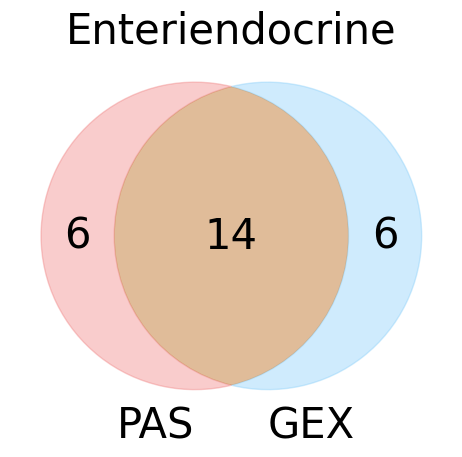

PAS owned {'ENSG00000145730.21', 'ENSG00000171159.5', 'ENSG00000118418.16', 'ENSG00000089199.10', 'ENSG00000118271.12', 'ENSG00000166681.14'}
expression owned {'ENSG00000079689.15', 'ENSG00000163497.3', 'ENSG00000178695.6', 'ENSG00000132475.10', 'ENSG00000162992.5', 'ENSG00000141837.22'}


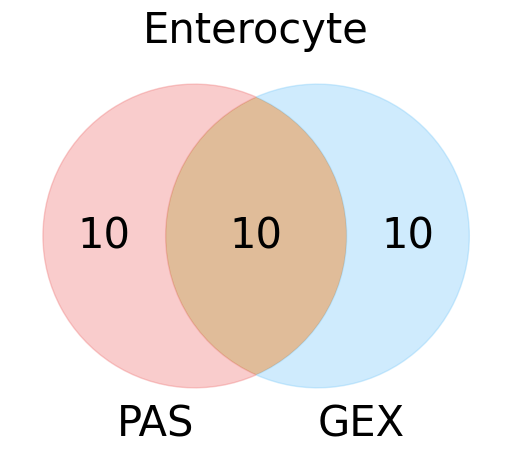

PAS owned {'ENSG00000091138.13', 'ENSG00000197165.11', 'ENSG00000185339.10', 'ENSG00000240498.9', 'ENSG00000138030.14', 'ENSG00000112818.11', 'ENSG00000118515.12', 'ENSG00000074276.11', 'ENSG00000173237.5', 'ENSG00000168060.16'}
expression owned {'ENSG00000204287.14', 'ENSG00000099812.9', 'ENSG00000117984.15', 'ENSG00000148671.14', 'ENSG00000166126.11', 'ENSG00000233041.8', 'ENSG00000163586.10', 'ENSG00000099834.19', 'ENSG00000136872.21', 'ENSG00000145384.4'}


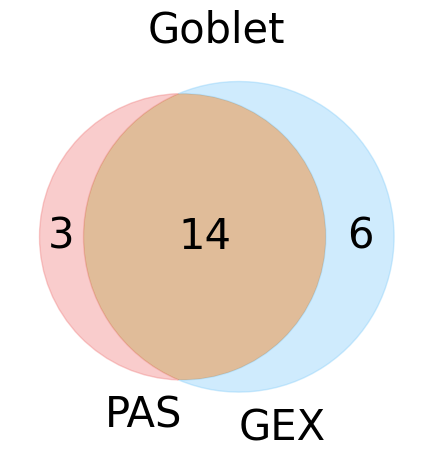

PAS owned {'ENSG00000116176.7', 'ENSG00000197249.14', 'ENSG00000101443.18'}
expression owned {'ENSG00000142669.15', 'ENSG00000163683.12', 'ENSG00000136826.15', 'ENSG00000214530.10', 'ENSG00000106541.12', 'ENSG00000064651.14'}


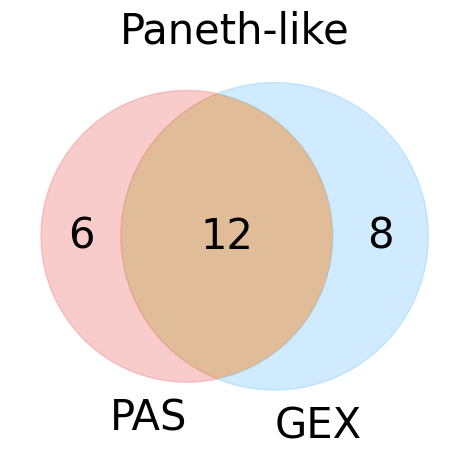

PAS owned {'ENSG00000187908.20', 'ENSG00000259823.6', 'ENSG00000090382.7', 'ENSG00000196196.3', 'ENSG00000124107.5', 'ENSG00000106565.19'}
expression owned {'ENSG00000030582.19', 'ENSG00000125968.9', 'ENSG00000286219.2', 'ENSG00000135916.16', 'ENSG00000132475.10', 'ENSG00000197747.9', 'ENSG00000142959.5', 'ENSG00000105388.17'}


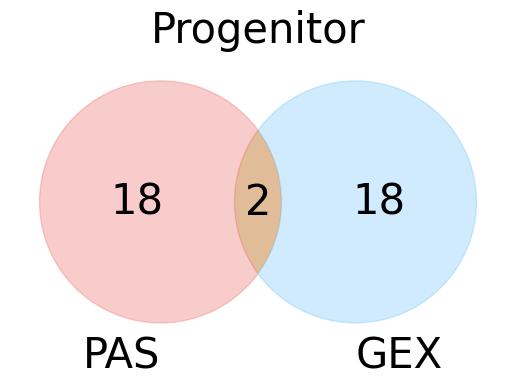

PAS owned {'ENSG00000226525.5', 'ENSG00000224631.4', 'ENSG00000124107.5', 'ENSG00000244313.3', 'ENSG00000243709.1', 'ENSG00000167775.11', 'ENSG00000242299.1', 'ENSG00000135052.16', 'ENSG00000123179.14', 'ENSG00000186854.11', 'ENSG00000108561.8', 'ENSG00000001626.18', 'ENSG00000118971.9', 'ENSG00000226084.5', 'ENSG00000272398.6', 'ENSG00000148346.12', 'ENSG00000176153.13', 'ENSG00000218175.2'}
expression owned {'ENSG00000137154.13', 'ENSG00000122406.14', 'ENSG00000105193.9', 'ENSG00000174748.22', 'ENSG00000089009.16', 'ENSG00000089157.16', 'ENSG00000159199.14', 'ENSG00000231500.7', 'ENSG00000182774.13', 'ENSG00000177600.9', 'ENSG00000136810.13', 'ENSG00000171863.15', 'ENSG00000162896.6', 'ENSG00000198755.11', 'ENSG00000168028.15', 'ENSG00000140988.16', 'ENSG00000137818.12', 'ENSG00000171858.18'}


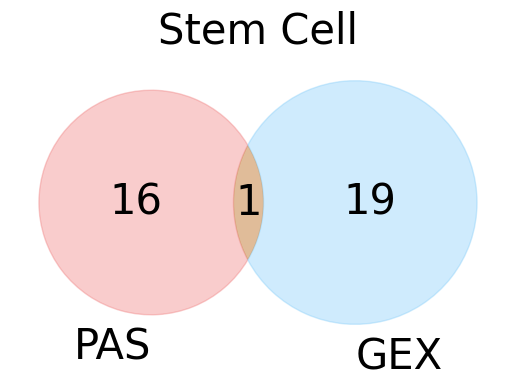

PAS owned {'ENSG00000204387.14', 'ENSG00000183734.5', 'ENSG00000175130.7', 'ENSG00000174136.13', 'ENSG00000244313.3', 'ENSG00000242299.1', 'ENSG00000137124.8', 'ENSG00000181163.14', 'ENSG00000157557.13', 'ENSG00000112562.20', 'ENSG00000102837.7', 'ENSG00000226084.5', 'ENSG00000227615.1', 'ENSG00000167748.11', 'ENSG00000064651.14', 'ENSG00000144354.15'}
expression owned {'ENSG00000144713.13', 'ENSG00000145425.10', 'ENSG00000171858.18', 'ENSG00000071082.11', 'ENSG00000138326.21', 'ENSG00000142541.18', 'ENSG00000167526.14', 'ENSG00000112306.8', 'ENSG00000140988.16', 'ENSG00000241343.10', 'ENSG00000137154.13', 'ENSG00000149273.15', 'ENSG00000197958.13', 'ENSG00000170889.14', 'ENSG00000145592.14', 'ENSG00000186468.13', 'ENSG00000109475.17', 'ENSG00000231500.7', 'ENSG00000105372.8'}


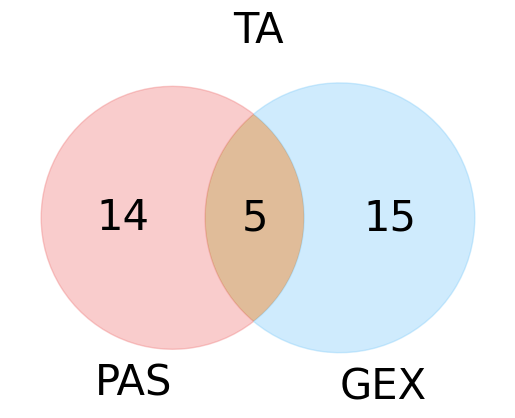

PAS owned {'ENSG00000203760.9', 'ENSG00000175063.17', 'ENSG00000173207.13', 'ENSG00000168393.13', 'ENSG00000182054.10', 'ENSG00000167900.12', 'ENSG00000089685.15', 'ENSG00000171848.16', 'ENSG00000164109.14', 'ENSG00000123975.5', 'ENSG00000176890.16', 'ENSG00000100162.15', 'ENSG00000166803.14', 'ENSG00000122952.17'}
expression owned {'ENSG00000137154.13', 'ENSG00000189403.15', 'ENSG00000198830.12', 'ENSG00000136942.15', 'ENSG00000187514.17', 'ENSG00000149273.15', 'ENSG00000089157.16', 'ENSG00000231500.7', 'ENSG00000105372.8', 'ENSG00000142937.12', 'ENSG00000168028.15', 'ENSG00000140988.16', 'ENSG00000137818.12', 'ENSG00000171858.18', 'ENSG00000241343.10'}


In [34]:
for celltype in pasgenedf['variable'].unique():
    plot_venn(celltype)
    